This notebooks is produced by:

- [Network Analysis Made Simple](https://ericmjl.github.io/Network-Analysis-Made-Simple/) by [Eric Ma](https://github.com/ericmjl) and [Mridul Seth](https://github.com/MridulS).

## Introduction to Network Analysis

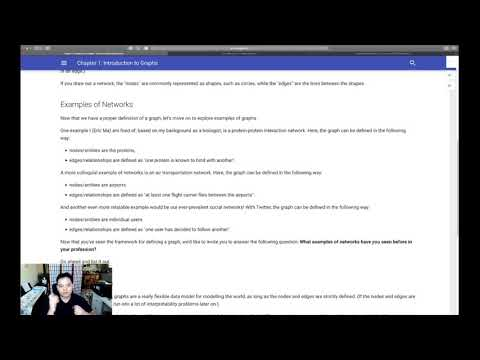

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo(id="k4KHoLC7TFE", width="100%")

In our world, networks are an immensely useful _data modelling tool_
to model complex _relational_ problems.
Building on top of a network-oriented data model,
they have been put to great use in a wide variety of settings.

## A _formal_ definition of networks

Before we explore examples of networks,
we want to first give you a more formal definition
of what networks are.
The reason is that knowing a _formal_ definition
helps us refine our application of networks.
So bear with me for a moment.

In the slightly more academic literature,
networks are more formally referred to as **graphs**.

Graphs are comprised of two _sets_ of objects:

- A **node set**: the "entities" in a graph.
- An **edge set**: the record of "relationships" between the entities in the graph.

For example, if a **node set** $n$ is comprised of elements:

$$n = \{a, b, c, d, ...\}$$

Then, the **edge set** $e$ would be represented as tuples of _pairs_ of elements:

$$e = \{(a, b), (a, c), (c, d), ...\}$$

If you extracted every node from the edge set $e$,
it should form _at least a subset_ of the node set $n$.
(It is at least a subset because not every node in $n$ might participate in an edge.)

If you draw out a network, the "nodes" are commonly represented as shapes, such as circles,
while the "edges" are the lines between the shapes.

## Examples of Networks

Now that we have a proper definition of a graph,
let's move on to explore examples of graphs.

One example I (Eric Ma) am fond of, based on my background as a biologist,
is a protein-protein interaction network.
Here, the graph can be defined in the following way:

- nodes/entities are the proteins,
- edges/relationships are defined as "one protein is known to bind with another".

A more colloquial example of networks is an air transportation network.
Here, the graph can be defined in the following way:

- nodes/entities are airports
- edges/relationships are defined as "at least one flight carrier flies between the airports".

And another even more relatable example would be our ever-prevalent social networks!
With Twitter, the graph can be defined in the following way:

- nodes/entities are individual users
- edges/relationships are defined as "one user has decided to follow another".

Now that you've seen the framework for defining a graph,
we'd like to invite you to answer the following question:
**What examples of networks have _you_ seen before in your profession?**

Go ahead and list it out.

## Types of Graphs

As you probably can see, graphs are a really flexible data model
for modelling the world,
as long as the nodes and edges are strictly defined.
(If the nodes and edges are _sloppily_ defined,
well, we run into a lot of interpretability problems later on.)

If you are a member of both LinkedIn and Twitter,
you might intuitively think that there's a _slight_ difference
in the structure of the two "social graphs".
You'd be absolutely correct on that count!

Twitter is an example of what we would intuitively call a **directed** graph.
Why is this so?
The key here lies in how interactions are modelled.
One user can follow another, but the other need not necessarily follow back.
As such, there is a _directionality_ to the relationship.

LinkedIn is an example of what we would intuitively call an **undirected** graph.
Why is this so?
The key here is that when two users are LinkedIn connections,
we _automatically_ assign a bi-directional edge between them.
As such, for convenience, we can collapse the bi-directional edge
into an _undirected_ edge,
thus yielding an undirected graph.

If we wanted to turn LinkedIn into a directed graph,
we might want to keep information on who initiated the invitation.
In that way, the relationship is automatically bi-directional.

## Edges define the interesting part of a graph

While in graduate school, I (Eric Ma) once sat in a seminar
organized by one of the professors on my thesis committee.
The speaker that day was John Quackenbush,
a faculty member of the Harvard School of Public Health.
While the topic of the day remained fuzzy in my memory,
one quote stood out:

> The heart of a graph lies in its edges, not in its nodes.
> (John Quackenbush, Harvard School of Public Health)

Indeed, this is a key point to remember!
Without edges, the nodes are merely collections of entities.
In a data table, they would correspond to the rows.
That alone can be interesting,
but doesn't yield _relational insights_ between the entities.

## Introduction to the NetworkX API

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo(id='sdF0uJo2KdU', width="100%")

In this chapter, we will introduce you to the NetworkX API.
This will allow you to create and manipulate graphs in your computer memory,
thus giving you a language 
to more concretely explore graph theory ideas.

Throughout the book, we will be using different graph datasets
to help us anchor ideas.
In this section, we will work with a social network of seventh graders.
Here, nodes are individual students,
and edges represent their relationships.
Edges between individuals show how often
the seventh graders indicated other seventh graders as their favourite.

The data are taken from the [Konect] graph data repository

[Konect]: http://konect.cc/networks/moreno_seventh

## Data Model

In NetworkX, graph data are stored in a dictionary-like fashion.
They are placed under a `Graph` object,
canonically instantiated with the variable `G` as follows:

```python
G = nx.Graph()
```

Of course, you are free to name the graph anything you want!

Nodes are part of the attribute `G.nodes`.
There, the node data are housed in a dictionary-like container,
where the key is the node itself
and the values are a dictionary of attributes. 
Node data are accessible using syntax that looks like:

```python
G.nodes[node1]
```

Edges are part of the attribute `G.edges`,
which is also stored in a dictionary-like container.
Edge data are accessible using syntax that looks like: 

```python
G.edges[node1, node2]
```
Because of the dictionary-like implementation of the graph,
any hashable object can be a node.
This means strings and tuples, but not lists and sets.

## Load Data

Let's load some real network data to get a feel for the NetworkX API. This [dataset](http://konect.cc/networks/moreno_seventh) comes from a study of 7th grade students.

> This directed network contains proximity ratings between students
> from 29 seventh grade students from a school in Victoria.
> Among other questions the students were asked
> to nominate their preferred classmates for three different activities.
> A node represents a student.
> An edge between two nodes shows that
> the left student picked the right student as his or her answer.
> The edge weights are between 1 and 3 
> and show how often the left student chose the right student as his/her favourite.

In the original dataset, students were from an all-boys school.
However, I have modified the dataset to instead be a mixed-gender school.

[README - Details of moreno_seventh](https://github.com/ericmjl/Network-Analysis-Made-Simple/blob/master/data/moreno_seventh/README.moreno_seventh)

In [ ]:
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
#from nams import load_data as cf

warnings.filterwarnings('ignore')

In [ ]:
# Read the edge list
df = pd.read_csv(
    "https://raw.githubusercontent.com/ericmjl/Network-Analysis-Made-Simple/master/data/moreno_seventh/out.moreno_seventh_seventh",
    skiprows=2,
    header=None,
    sep=" ",
)

df.columns = ["student1", "student2", "count"]

# Read the node metadata
meta = pd.read_csv(
   "https://raw.githubusercontent.com/ericmjl/Network-Analysis-Made-Simple/master/data/moreno_seventh/ent.moreno_seventh_seventh.student.gender",
    header=None,
)
meta.index += 1
meta.columns = ["gender"]

# Construct graph from edge list.
G = nx.DiGraph()
for row in df.iterrows():
    G.add_edge(row[1]["student1"], row[1]["student2"], count=row[1]["count"])
# Add node metadata
for n in G.nodes():
    G.nodes[n]["gender"] = meta.loc[n]["gender"]


## Understanding a graph's basic statistics

When you get graph data,
one of the first things you'll want to do is to
check its basic graph statistics:
the number of nodes
and the number of edges
that are represented in the graph.
This is a basic sanity-check on your data
that you don't want to skip out on.

### Querying graph type

The first thing you need to know is the `type` of the graph:

In [ ]:
type(G)

networkx.classes.digraph.DiGraph

Because the graph is a `DiGraph`,
this tells us that the graph is a **directed** one.

If it were undirected, the type would change:

In [ ]:
H = nx.Graph()
type(H)

networkx.classes.graph.Graph

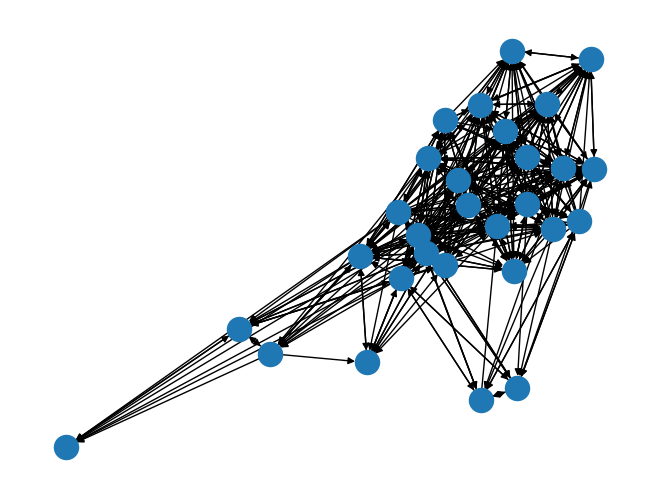

In [ ]:
nx.draw(G)
plt.show()

### Querying node information

Let's now query for the nodeset:

In [ ]:
list(G.nodes())[0:5]

[1, 2, 3, 4, 5]

`G.nodes()` returns a "view" on the nodes.
We can't actually slice into the view and grab out a sub-selection,
but we can _at least_ see what nodes are present.
For brevity, we have sliced into `G.nodes()` passed into a `list()` constructor,
so that we don't pollute the output.
Because a `NodeView` is iterable, though,
we can query it for its length:

In [ ]:
len(G.nodes())

29

If our nodes have metadata attached to them,
we can view the metadata at the same time
by passing in `data=True`:

In [ ]:
list(G.nodes(data=True))[0:5]

[(1, {'gender': 'male'}),
 (2, {'gender': 'male'}),
 (3, {'gender': 'male'}),
 (4, {'gender': 'male'}),
 (5, {'gender': 'male'})]

G.nodes(data=True) returns a `NodeDataView`,
which you can see is dictionary-like.

Additionally, we can select out individual nodes:

In [ ]:
G.nodes[1]

{'gender': 'male'}

Now, because a `NodeDataView` is dictionary-like,
looping over `G.nodes(data=True)`
is very much like looping over key-value pairs of a dictionary.
As such, we can write things like:

```python
for n, d in G.nodes(data=True):
    # n is the node
    # d is the metadata dictionary
    ...
```

This is analogous to how we would loop over a dictionary:

```python
for k, v in dictionary.items():
    # do stuff in the loop
```

Naturally, this leads us to our first exercise.

### Exercise: Summarizing node metadata

> Can you count how many males and females are represented in the graph?

In [ ]:
#### REPLACE THE NEXT LINE WITH YOUR ANSWER


Test your implementation by checking it against the `test_answer` function below.

In [ ]:
from typing import Dict

def test_answer(mf_counts: Dict):
    assert mf_counts['female'] == 17
    assert mf_counts['male'] == 12
    
test_answer(mf_counts)

In [ ]:
test_answer(mf_counts)

With this dictionary-like syntax,
we can query back the metadata that's associated with any node.

### Querying edge information

Now that you've learned how to query for node information,
let's now see how to query for all of the edges in the graph:

In [ ]:
list(G.edges())[0:5]

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6)]

Similar to the `NodeView`, `G.edges()` returns an `EdgeView` that is also iterable.
As with above, we have abbreviated the output inside a sliced list
to keep things readable.
Because `G.edges()` is iterable, we can get its length to see the number of edges
that are present in a graph.

In [ ]:
len(G.edges())

376

Likewise, we can also query for all of the edge's metadata:

In [ ]:
list(G.edges(data=True))[0:5]

[(1, 2, {'count': 1}),
 (1, 3, {'count': 1}),
 (1, 4, {'count': 2}),
 (1, 5, {'count': 2}),
 (1, 6, {'count': 3})]

Additionally, it is possible for us to select out individual edges, as long as they exist in the graph:

In [ ]:
G.edges[15, 10]

{'count': 2}

This yields the metadata dictionary for that edge.

If the edge does not exist, then we get an error:

```python
>>> G.edges[15, 16]
```

```python
---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<ipython-input-21-ce014cab875a> in <module>
----> 1 G.edges[15, 16]

~/anaconda/envs/nams/lib/python3.7/site-packages/networkx/classes/reportviews.py in __getitem__(self, e)
    928     def __getitem__(self, e):
    929         u, v = e
--> 930         return self._adjdict[u][v]
    931 
    932     # EdgeDataView methods

KeyError: 16
```

As with the `NodeDataView`, the `EdgeDataView` is dictionary-like,
with the difference being that the keys are 2-tuple-like
instead of being single hashable objects.
Thus, we can write syntax like the following to loop over the edgelist:

```python
for n1, n2, d in G.edges(data=True):
    # n1, n2 are the nodes
    # d is the metadata dictionary
    ...
```

Naturally, this leads us to our next exercise.

In [ ]:
#### REPLACE THE NEXT LINE WITH YOUR ANSWER

### Exercise: Summarizing edge metadata

> Can you write code to verify
> that the maximum times any student rated another student as their favourite
> is 3 times?

Likewise, you can test your answer using the test function below:

In [ ]:
def test_maxcount(maxcount):
    assert maxcount == 3


## Manipulating the graph

Great stuff! You now know how to query a graph for:

- its node set, optionally including metadata
- individual node metadata
- its edge set, optionally including metadata, and 
- individual edges' metadata

Now, let's learn how to manipulate the graph.
Specifically, we'll learn how to add nodes and edges to a graph.

### Adding Nodes

The NetworkX graph API lets you add a node easily:

```python
G.add_node(node, node_data1=some_value, node_data2=some_value)
```

### Adding Edges

It also allows you to add an edge easily:

```python
G.add_edge(node1, node2, edge_data1=some_value, edge_data2=some_value)
```

### Metadata by Keyword Arguments

In both cases, the keyword arguments that are passed into `.add_node()`
are automatically collected into the metadata dictionary.

Knowing this gives you enough knowledge to tackle the next exercise.

### Exercise: adding students to the graph

> We found out that there are two students that we left out of the network,
> student no. 30 and 31. 
> They are one male (30) and one female (31), 
> and they are a pair that just love hanging out with one another 
> and with individual 7 (i.e. `count=3`), in both directions per pair. 
> Add this information to the graph.

In [ ]:
#### REPLACE THE NEXT LINE WITH YOUR ANSWER


You can verify that the graph has been correctly created
by executing the test function below.

In [ ]:
def test_graph_integrity(G):
    assert 30 in G.nodes()
    assert 31 in G.nodes()
    assert G.nodes[30]['gender'] == 'male'
    assert G.nodes[31]['gender'] == 'female'
    assert G.has_edge(30, 31)
    assert G.has_edge(30, 7)
    assert G.has_edge(31, 7)
    assert G.edges[30, 7]['count'] == 3
    assert G.edges[7, 30]['count'] == 3
    assert G.edges[31, 7]['count'] == 3
    assert G.edges[7, 31]['count'] == 3
    assert G.edges[30, 31]['count'] == 3
    assert G.edges[31, 30]['count'] == 3
    print('All tests passed.')
    
test_graph_integrity(G)

## Coding Patterns

These are some recommended coding patterns when doing network analysis using NetworkX,
which stem from my personal experience with the package.

### Iterating using List Comprehensions
I would recommend that you use the following for compactness: 

```python
[d['attr'] for n, d in G.nodes(data=True)]
```

And if the node is unimportant, you can do:

```python
[d['attr'] for _, d in G.nodes(data=True)]
```

### Iterating over Edges using List Comprehensions

A similar pattern can be used for edges:

```python
[n2 for n1, n2, d in G.edges(data=True)]
```

or

```python
[n2 for _, n2, d in G.edges(data=True)]
```

If the graph you are constructing is a directed graph,
with a "source" and "sink" available,
then I would recommend the following naming of variables instead:

```python
[(sc, sk) for sc, sk, d in G.edges(data=True)]
```

or 

```python
[d['attr'] for sc, sk, d in G.edges(data=True)]
```

## Further Reading

For a deeper look at the NetworkX API,
be sure to check out the [NetworkX docs][nxdocs].

[nxdocs]: https://networkx.readthedocs.io

## Further Exercises

Here's some further exercises that you can use to get some practice.

### Exercise: Unrequited Friendships

> Try figuring out which students have "unrequited" friendships, that is, 
> they have rated another student as their favourite at least once, 
> but that other student has not rated them as their favourite at least once.

_Hint: the goal here is to get a list of edges for which the reverse edge is not present._

_Hint: You may need the class method `G.has_edge(n1, n2)`. This returns whether a graph has an edge between the nodes `n1` and `n2`._

In [ ]:
#### REPLACE THE NEXT LINE WITH YOUR ANSWER


In a previous session at ODSC East 2018, a few other class participants provided the following solutions,
which you can take a look at by uncommenting the following cells.

# Graph Visualization

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

## Introduction

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo(id="v9HrR_AF5Zc", width="100%")

In this chapter, We want to introduce you to the wonderful world of graph visualization.

You probably have seen graphs that are visualized as hairballs.
Apart from communicating how complex the graph is,
hairballs don't really communicate much else.
As such, my goal by the end of this chapter is 
to introduce you to what I call _rational graph visualization_.

But before we can do that, let's first make sure we understand
how to use NetworkX's drawing facilities to draw graphs to the screen.
In a pinch, and for small graphs, it's very handy to have.

## Hairballs

The node-link diagram is the canonical diagram we will see in publications.
Nodes are commonly drawn as circles, while edges are drawn s lines.

Node-link diagrams are common,
and there's a good reason for this: it's convenient to draw!
In NetworkX, we can draw node-link diagrams using:

In [ ]:
from nams import load_data as cf
import networkx as nx
import matplotlib.pyplot as plt

G = cf.load_seventh_grader_network()

In [ ]:
nx.draw(G)

Nodes more tightly connected with one another are clustered together. 
Initial node placement is done typically at random,
so really it's tough to deterministically generate the same figure.
If the network is small enough to visualize,
and the node labels are small enough to fit in a circle,
then you can use the `with_labels=True` argument
to bring some degree of informativeness to the drawing:

In [ ]:
G.is_directed()

In [ ]:
nx.draw(G, with_labels=True)

The downside to drawing graphs this way is that
large graphs end up looking like hairballs.
Can you imagine a graph with more than the 28 nodes that we have?
As you probably can imagine, the default `nx.draw(G)`
is probably not suitable for generating visual insights.

## Matrix Plot

A different way that we can visualize a graph is by visualizing it in its matrix form.
The nodes are on the x- and y- axes, and a filled square represent an edge between the nodes.

We can draw a graph's matrix form conveniently by using `nxviz.MatrixPlot`:

In [ ]:
import nxviz as nv 
from nxviz import annotate


nv.matrix(G, group_by="gender", node_color_by="gender")
annotate.matrix_group(G, group_by="gender")

What can you tell from the graph visualization?
A few things are immediately obvious:

- The diagonal is empty: no student voted for themselves as their favourite.
- The matrix is asymmetric about the diagonal: this is a directed graph!

(An undirected graph would be symmetric about the diagonal.)

You might go on to suggest that there is some clustering happening,
but without applying a proper clustering algorithm on the adjacency matrix,
we would be hard-pressed to know for sure.
After all, we can simply re-order the node ordering along the axes
to produce a seemingly-random matrix.

## Arc Plot

The Arc Plot is another rational graph visualization.
Here, we line up the nodes along a horizontal axis,
and draw _arcs_ between nodes if they are connected by an edge.
We can also optionally group and colour them by some metadata.
In the case of this student graph,
we group and colour them by "gender".

In [ ]:
# a = ArcPlot(G, node_color='gender', node_grouping='gender')
nv.arc(G, node_color_by="gender", group_by="gender")
annotate.arc_group(G, group_by="gender")

The Arc Plot forms the basis of the next visualization,
the highly popular Circos plot.

## Circos Plot

The Circos Plot was developed by [Martin Krzywinski][bccrc] at the BC Cancer Research Center. The `nxviz.CircosPlot` takes inspiration from the original by joining the two ends of the Arc Plot into a circle. Likewise, we can colour and order nodes by node metadata:

[bccrc]: http://circos.ca/

In [ ]:
nv.circos(G, group_by="gender", node_color_by="gender")
annotate.circos_group(G, group_by="gender")

Generally speaking, you can think of a Circos Plot as being
a more compact and aesthetically pleasing version of Arc Plots.

## Hive Plot

The final plot we'll show is, Hive Plots.

In [ ]:
from nxviz import plots
import matplotlib.pyplot as plt 

nv.hive(G, group_by="gender", node_color_by="gender")
annotate.hive_group(G, group_by="gender")

As you can see, with Hive Plots,
we first group nodes along two or three radial axes.
In this case, we have the boys along one radial axis
and the girls along the other.
We can also order the nodes along each axis if we so choose to.
In this case, no particular ordering is chosen.

Next, we draw edges.
We start first with edges _between_ groups.
That is shown on the left side of the figure,
joining nodes in the "yellow" and "green" (boys/girls) groups.
We then proceed to edges _within_ groups.
This is done by cloning the node radial axis
before drawing edges.

## Principles of Rational Graph Viz

While I was implementing these visualizations in `nxviz`,
I learned an important lesson in implementing graph visualizations in general:

> To be most informative and communicative,
> a graph visualization should first prioritize node placement
> in a fashion that makes sense.

In some ways, this makes a ton of sense.
The nodes are the "entities" in a graph,
corresponding to people, proteins, and ports.
For "entities", we have natural ways to group, order and summarize (reduce).
(An example of a "reduction" is counting the number of things.)
Prioritizing node placement allows us
to appeal to our audience's natural sense of grouping, ordering and reduction.

So the next time you see a hairball,
I hope you're able to critique it for what it doesn't communicate,
and possibly use the same principle to design a better visualization!